Projet DATA MINING 

In [30]:
#Choix du repertoire de données 
import os
os.chdir('/Users/learegazzetti/Documents/Cours/M1_Info/Data_Mining_M1_Info/Projet')

In [31]:
#Importation des données
import pandas
data=pandas.read_csv('data_avec_etiquettes.txt',sep="\t")

In [32]:
#Vérification des informations 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 200 entries, V1 to V200
dtypes: float64(15), int64(181), object(4)
memory usage: 753.8+ MB


In [33]:
data.shape

(494021, 200)

In [34]:
#Recodage des variables qualitatives : V160,V161,V162 en variables codées en 0/1
import numpy
liste_quali=[var for var in data.columns[:-1] if data[var].dtype==numpy.object_]

#Recodage des variables qualitatives
df_Recodage= pandas.get_dummies(data[liste_quali])

In [35]:
#Constitution du data frame entier avec les variables quantitatives 
#et qualitatives

#Liste des variables quantitatives
liste_quanti=[var for var in data.columns[:-1] if data[var].dtype!=numpy.object_]

#Réunir les quantitatives et les variables qualitatives recodées
data_New=pandas.concat([data[liste_quanti],df_Recodage],axis=1)

In [36]:
#Ajouter la variable cible : V200
data_New['V200'] = data.V200

In [37]:
#Affichage des informations du fichier
print(data_New.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 277 entries, V1 to V200
dtypes: float64(15), int64(181), object(1), uint8(80)
memory usage: 780.2+ MB
None


In [38]:
#Scinder les échantillons test et d'apprentissage

#Importation du module pour subdiviser
import sklearn
from sklearn import model_selection

train,test=model_selection.train_test_split(data_New,test_size=round(data_New.shape[0]*30/100),random_state=1)

In [39]:
x_train=train.iloc[:,0:data_New.shape[1]-1]
y_train=train.iloc[:,data_New.shape[1]-1]
print(x_train.shape,y_train.shape)

x_test=test.iloc[:,0:data_New.shape[1]-1]
y_test=test.iloc[:,data_New.shape[1]-1]
print(x_test.shape,y_test.shape)

(345815, 276) (345815,)
(148206, 276) (148206,)


In [40]:
#Première sélection de variables : pour enlever les colonnes de constantes
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(x_train)

VarianceThreshold()

In [41]:
#Liste des variables constantes
print(x_train.columns[selector.variances_ == 0])

Index(['V178', 'V179', 'V161_m45'], dtype='object')


In [42]:
#Réduction de la base d'apprentissage aux variables sélectionnées
x_train = x_train.iloc[:,selector.get_support()] 
print(x_train.shape) # 273 variables restantes


(345815, 273)


In [43]:
#réduction de la base test aux mêmes variables
x_test = x_test.iloc[:,selector.get_support()] 
print(x_test.shape)

(148206, 273)


Docu sur les arbres de décision:

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now

In [44]:
#Arbre de décision

#Instanciation
from sklearn.tree import DecisionTreeClassifier

#Instanciation objet arbre de décision
dtree = DecisionTreeClassifier(random_state=1)
#Random_state=1 pour pouvoir reproduire l'approche sinon cf documentation :
#Controls the randomness of the estimator. The features are always randomly permuted at each split,
print(dtree)


DecisionTreeClassifier(random_state=1)


In [45]:
#Affichage des paramètres par défaut
print(dtree.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}


In [46]:
#Modèle sur les données d'apprentissage
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

[Text(273.54629524632674, 214.33371428571428, 'V182 <= 315.5\ngini = 0.591\nsamples = 345815\nvalue = [1538, 75039, 163, 68172, 2, 3, 183, 728, 4, 1121\n196520, 23, 2, 663, 705, 16, 5, 34, 10, 860, 13\n6, 5]'),
 Text(236.17647788661506, 208.12114285714284, 'V187 <= 0.325\ngini = 0.54\nsamples = 149503\nvalue = [1538, 75039, 163, 68158, 2, 3, 183, 728, 4, 1121\n222, 23, 2, 663, 705, 16, 5, 34, 10, 860, 13, 6\n5]'),
 Text(166.80079510310622, 201.90857142857143, 'V193 <= 0.145\ngini = 0.038\nsamples = 75853\nvalue = [0, 74384, 1, 309, 0, 0, 0, 70, 0, 1054, 0, 1\n0, 33, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(148.1387123260702, 195.696, 'V163 <= 0.5\ngini = 0.004\nsamples = 74538\nvalue = [0, 74371, 1, 132, 0, 0, 0, 16, 0, 16, 0, 1, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(138.9752944355495, 189.48342857142856, 'V194 <= 0.065\ngini = 0.001\nsamples = 74390\nvalue = [0, 74371, 0, 0, 0, 0, 0, 16, 0, 2, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(132.2703545156563, 183.27085714285715, 'V188 

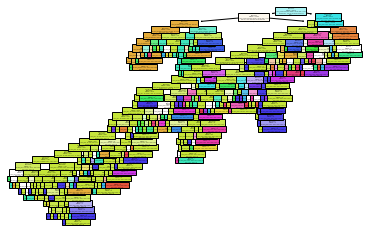

In [19]:
#Affichage graphique
from sklearn.tree import plot_tree
plot_tree(dtree,feature_names = list(x_train.columns),filled=True)

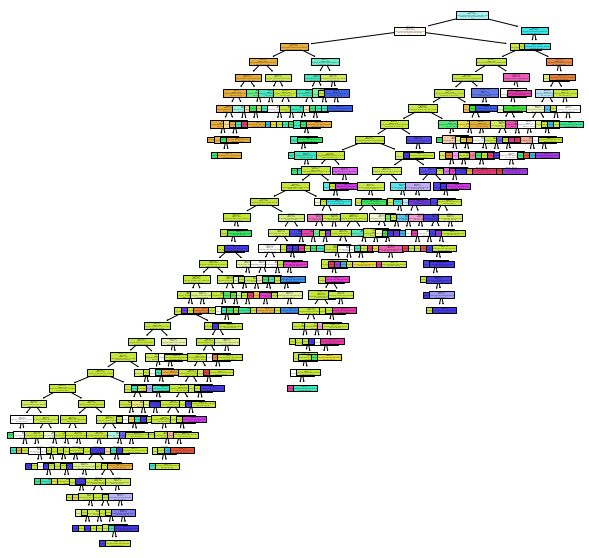

In [20]:
#affichage plus grand pour une meilleure lisibilité
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dtree,feature_names = list(x_train.columns),filled=True)
plt.show()

In [47]:
#Appliquer le modèle sur l'échantillon test
YPred=dtree.predict(X=x_test)

In [48]:
import numpy 
print(numpy.unique(YPred,return_counts=True))

(array(['m1', 'm10', 'm11', 'm12', 'm15', 'm16', 'm17', 'm18', 'm19', 'm2',
       'm20', 'm21', 'm22', 'm23', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8',
       'm9'], dtype=object), array([  667, 32162,    73, 29104,    82,   314,     1,   463, 84270,
           9,     1,   316,   314,     9,     1,    17,     3,   386,
           8,     3,     3]))


In [49]:
#Matrice de confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_test,YPred))

[[  665     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0 32158     0     2     0     0     0     1     0     1     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0    65     3     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    2     1     4 29075     0     0     1     4     0     1     0     0
      1     0     8     0     0     0     2     0     1     3     3]
 [    0     0     0     0     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0    81     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]

In [50]:
#Taux d'erreur 
tx_erreur = 1- (metrics.accuracy_score(y_test,YPred))
print(tx_erreur)

0.0005937681335438372


In [25]:
######Post pruning decision trees with cost complexity pruning : Post Elagage

In [26]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [27]:
#In the following plot, the maximum effective alpha value is removed,
#because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

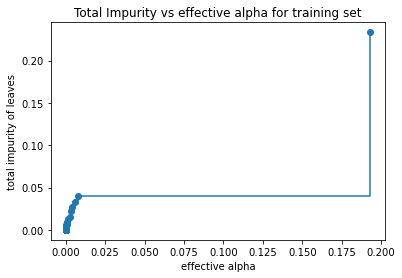

In [28]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Text(0, 0.5, 'total depth')

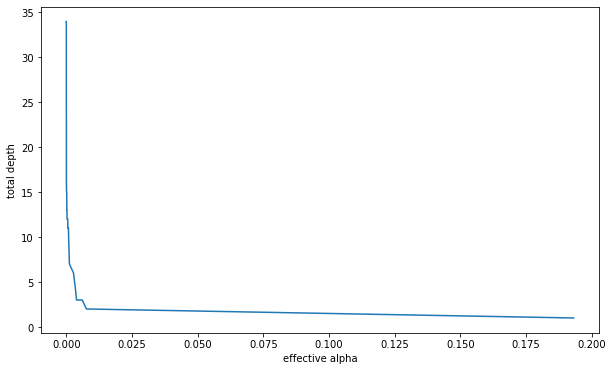

In [31]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

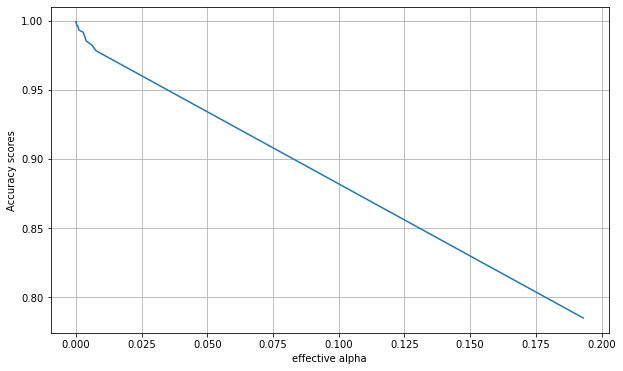

In [32]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(x_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

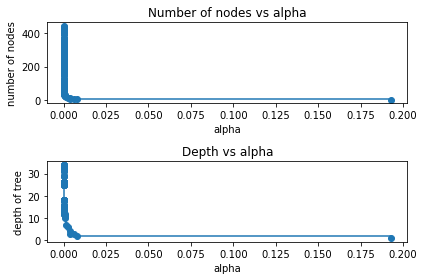

In [33]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

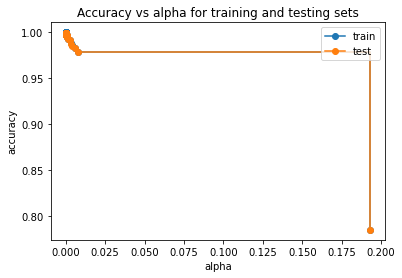

In [34]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
#Meilleur modèle
index_best_model = numpy.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

Training accuracy of best model:  0.9999305987305351
Test accuracy of best model:  0.9994467160573796


In [36]:
best_model #paramètres du meilleur modèle

DecisionTreeClassifier(ccp_alpha=2.8917195610369708e-06, random_state=1)

In [37]:
#prédiction avec le meilleur modèle
y_pred3 = best_model.predict(x_test)

#erreur en test
print(1.0 - metrics.accuracy_score(y_test,y_pred3))

0.0005532839426204417


In [51]:
#Arbre de décision avec les paramètres optimisés

#Instanciation
from sklearn.tree import DecisionTreeClassifier

#Instanciation arbre de décision
dtree_opt = DecisionTreeClassifier(ccp_alpha=2.8917195610369708e-06, random_state=1, max_depth=15)
#max_depth déterminé en lecture du graphique 
print(dtree_opt)

DecisionTreeClassifier(ccp_alpha=2.8917195610369708e-06, max_depth=15,
                       random_state=1)


In [52]:
#Modèle sur les données d'apprentissage
dtree_opt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=2.8917195610369708e-06, max_depth=15,
                       random_state=1)

[Text(246.78896484375, 210.645, 'V182 <= 315.5\ngini = 0.591\nsamples = 345815\nvalue = [1538, 75039, 163, 68172, 2, 3, 183, 728, 4, 1121\n196520, 23, 2, 663, 705, 16, 5, 34, 10, 860, 13\n6, 5]'),
 Text(191.5259765625, 197.055, 'V187 <= 0.325\ngini = 0.54\nsamples = 149503\nvalue = [1538, 75039, 163, 68158, 2, 3, 183, 728, 4, 1121\n222, 23, 2, 663, 705, 16, 5, 34, 10, 860, 13, 6\n5]'),
 Text(91.8, 183.465, 'V193 <= 0.145\ngini = 0.038\nsamples = 75853\nvalue = [0, 74384, 1, 309, 0, 0, 0, 70, 0, 1054, 0, 1\n0, 33, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(57.375, 169.875, 'V163 <= 0.5\ngini = 0.004\nsamples = 74538\nvalue = [0, 74371, 1, 132, 0, 0, 0, 16, 0, 16, 0, 1, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(39.825, 156.285, 'V194 <= 0.065\ngini = 0.001\nsamples = 74390\nvalue = [0, 74371, 0, 0, 0, 0, 0, 16, 0, 2, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'),
 Text(26.325, 142.695, 'V188 <= 0.93\ngini = 0.0\nsamples = 74374\nvalue = [0, 74369, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0

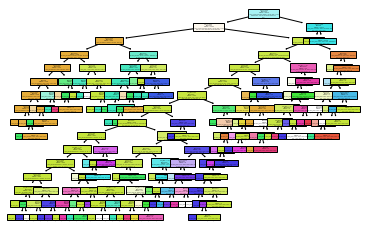

In [72]:
#Affichage graphique
from sklearn.tree import plot_tree
plot_tree(dtree_opt,feature_names = list(x_train.columns),filled=True)

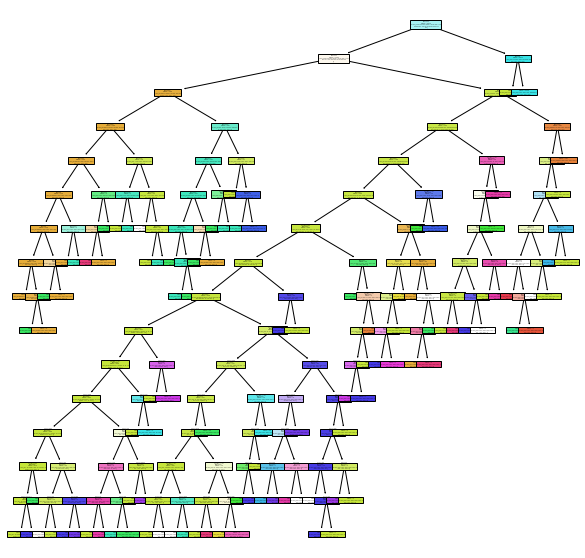

In [210]:
#affichage plus grand pour une meilleure lisibilité
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dtree_opt,feature_names = list(x_train.columns),filled=True)
plt.show()

In [53]:
#Appliquer le modèle sur l'échantillon test
YPred_opt=dtree_opt.predict(X=x_test)

In [54]:
#Matrice de confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_test,YPred_opt))

[[  662     0     0     3     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0 32156     0     4     0     0     0     1     0     1     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0    61     7     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     3     0 29092     0     0     0     2     0     0     0     0
      0     6     0     1     0     0     0     1     1     0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0    81     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     9     0     0    

In [55]:
#Taux d'erreur 
tx_erreur = 1- (metrics.accuracy_score(y_test,YPred_opt))
print(tx_erreur)

0.0007691996275454027


In [56]:
#Comptage
import numpy
print(numpy.unique(YPred_opt,return_counts=True))

(array(['m1', 'm10', 'm11', 'm12', 'm15', 'm16', 'm18', 'm19', 'm2', 'm21',
       'm22', 'm23', 'm3', 'm4', 'm6', 'm7', 'm8'], dtype=object), array([  662, 32168,    62, 29164,    81,   302,   455, 84268,     7,
         316,   299,     8,     2,    17,   387,     7,     1]))


In [57]:
#On souhaite obtenir l'importance de chaque variable dans l'arbre de décision
importance_variable={"Variable":x_train.columns,"Importance":dtree_opt.feature_importances_}
imp=pandas.DataFrame(importance_variable).sort_values(by="Importance",ascending=False)
print(imp)

    Variable  Importance
176     V182    0.606093
181     V187    0.327226
167     V171    0.013009
187     V193    0.011667
189     V195    0.007029
..       ...         ...
102     V103    0.000000
103     V104    0.000000
104     V105    0.000000
105     V106    0.000000
272  V162_m9    0.000000

[273 rows x 2 columns]


In [58]:
#On veut seulement celles qui contribuent dans le modèle donc Importance > à 0
variables_importantes=imp.Variable[imp.Importance>0]
print(variables_importantes.shape)

(53,)


In [49]:
#Export de la liste des variables qui contribuent pour le déploiement après
variables_importantes.to_csv('variables_importantes_arbre.txt', header=False, index=False)

In [59]:
#On sélectionne que les variables dans nos échantillons train et test

x_train_selection=x_train.values[:,variables_importantes.index]
x_test_selection=x_test.values[:,variables_importantes.index]

print(x_train_selection.shape,x_test_selection.shape)

(345815, 53) (148206, 53)


In [60]:
#Arbre de décision sur les données d'apprentissage avec la sélection de variables
dtree_opt.fit(x_train_selection,y_train)

DecisionTreeClassifier(ccp_alpha=2.8917195610369708e-06, max_depth=15,
                       random_state=1)

In [61]:
#Appliquer le modèle sur l'échantillon test
YPred_selection=dtree_opt.predict(X=x_test_selection)

In [62]:
#Matrice de confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_test,YPred_selection))

[[  662     0     0     3     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0 32154     0     4     0     0     0     1     0     2     0     0
      0     0     0     0     0     0     0     1     0     0]
 [    0     0    61     7     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     3     0 29091     0     0     1     2     0     1     0     0
      0     4     0     1     0     1     0     1     1     0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0    81     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     9     0     0    

In [63]:
#Taux d'erreur 
tx_erreur = 1- (metrics.accuracy_score(y_test,YPred_selection))
print(tx_erreur)

0.0007826943578532752


In [84]:
#affichage sous forme de règles
#plus facile à appréhender quand l'arbre est très grand
from sklearn.tree import export_text
tree_rules = export_text(dtree_opt,feature_names = list(x_train.columns),show_weights=True)
print(tree_rules)

|--- V182 <= 315.50
|   |--- V187 <= 0.33
|   |   |--- V193 <= 0.15
|   |   |   |--- V163 <= 0.50
|   |   |   |   |--- V194 <= 0.06
|   |   |   |   |   |--- V188 <= 0.93
|   |   |   |   |   |   |--- V194 <= 0.05
|   |   |   |   |   |   |   |--- V188 <= 0.56
|   |   |   |   |   |   |   |   |--- weights: [0.00, 74338.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: m10
|   |   |   |   |   |   |   |--- V188 >  0.56
|   |   |   |   |   |   |   |   |--- V196 <= 0.51
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: m16
|   |   |   |   |   |   |   |   |--- V196 >  0.51
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 28.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class:

SAUVEGARDE DU MODELE

In [55]:
#librairie pour sauvegarde du modèle
import pickle

#référence du fichier - ouverture en écriture binaire
f = open("modele_arbre_decision.sav","wb")


In [56]:
#sauvegarde dans le fichier référencé
pickle.dump(dtree_opt, f)


In [57]:
#fichier qu'il faut fermer
f.close()